# A Quick-and-Dirty Attempt to Maximize "Percentile Kurtosis"

In [ ]:
from typing import Tuple, Iterable, Generator, Optional
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Motivation

Suppose someone tells you the event $X=x$ is a "$+4\sigma$ event" i.e. that
its $z$-score $z(X=x) = +4$. That sounds statistically extreme!
In other words, $\Pr[X > x]$ is probably very low.
Indeed, if $X$ is Normal, $X > x$ would be essentially impossible.


I want to try to construct a "pathological" example: A distribution
with finite mean $\mu$ and standard deviation $\sigma$
where an event more extreme than $X = x := \mu + 4\sigma$
(i.e. more than a $+4\sigma$ event)
is actually _very_ likely. This is hard, but I'll settle for
making it _pretty_ likely.


In other words, I want to construct a distribution that is highly "percentile-kurtotic":
A distribution where $\Pr[X > \mu + 4\sigma]$ is maximal.


## Definitions

### $z$-score

We define $z$-score
$$z(X=x) := \frac{x - \mu(X)}{\sigma(X)},$$

with
$$\sigma^2(X) := \int_{x=-\infty}^{x=\infty} (x - \mu(X))^2 \Pr[X=x] dx,$$

where $X$ is a random variable and we abuse notation a bit to let $\Pr[X=x]$
represent its probability density function.
(We're going to continue to be a bit hand-wavey with this,
assuming some mild conditions e.g. PDF is continuous.)


### percentile

We define percentile (AKA cumulative distribution function) the usual way, as
$$Pr[X \leq x] := \int_{t=-\infty}^{t=x} \Pr[X=t] dt.$$


### "percentile kurtosis"

Finally, as I alluded above, I'm going to define the "percentile kurtosis"
(a made-up term) $k$ of a random variable as
$$k(X) := 1 - \Pr[X \leq \mu(X) + 4\sigma(X)],$$

the complement-percentile of a $+4\sigma$ event.
Maximizing $k$ is equivalent to minimizing the percentile.


Notice that $k$ is location- and scale-invariant:
$$k(a + bX) = k(X) \qquad\;\forall\; a,\, b \in \mathbb{R}^2.$$


## Background

Using the definitions above, let's answer a couple quick questions.


### Can $k$ be literally 0, i.e. $\Pr[X \leq \mu + 4\sigma] = 1$?

Yes. Consider the Standard Uniform from 0 to 1.
$$\mu + 4\sigma = 0.5 + 4\sqrt{1/12} \approx 1.65 > 1,$$

so that a $4\sigma$ event is not just "essentially" impossible,
but "literally" impossible: It's literally outside the support
of the distribution.

This is not a very helpful example for our question, because
we want to _maximize_ $k$. But it's just background.


### Can $k$ be essentially but not literally 0?

Yes, we already mentioned the example of the Standard Normal.


### Can $k$ be some small but nontrivial positive value?

Yes, the Standard $\chi^2$ distribution has $\mu = 1$ and $\sigma = \sqrt{2}$.
In this case, $k = 1 - \Pr[X \leq \mu + 4\sigma]$ turns out to be about $0.01$.


### Can $k$ be literally 1, i.e. $\Pr[X \leq \mu + 4\sigma] = 0$?

No. This sounds silly but it's still worth convincing ourselves that
it's truly impossible.


Assume for simplicity that $\mu = 0$ (this is WLOG, because if $\mu \neq 0$,
we can just shift the entire distribution by $-\mu$).


Suppose to the contrary that it is possible, i.e. there is some
random variable $X$ s.t. $\Pr[X \leq +4\sigma] = 0$.
Then,
$$\Pr[X = x] = 0 \qquad\;\forall\; x \in (-\infty,\, +4\sigma].$$

Hence, we can collapse the expression for variance to
$$\sigma^2(X) = \int_{x=+4\sigma}^{x=+\infty} x^2 \Pr[X=x] dx.$$

So we can think of the variance as a weighted average of
squared values between $+4\sigma$ and $+\infty$.


Standard deviation is of course nonnegative, so also
$+4\sigma \geq 0$. So the smallest squared value
in the weighted average is $(+4\sigma)^2 = 16\sigma^2$.
Necessarily, then, the final weighted average must be
at least $16\sigma^2$. (Actually, it must be just a smidge more than $16\sigma^2$,
because we put zero density at exactly $X = +4\sigma$,
hence the smallest-possible squared value is $(+4\sigma + \varepsilon)^2$,
and if we accounted for this smidge, we'd run into a contradiction
immediately. However, I find it more illuminating at this step to draw
the weaker conclusion, which is still true,
but lets us run further before hitting a contradiction.)


Hence we get
$$\sigma^2 \geq 16\sigma^2 \implies \sigma = 0.$$


So supposing that $k$ can be $1$ for some distribution,
that distribution must have zero variance.


Well, according to a convention, the Dirac delta is the
unique probability density function with zero variance
(take this for granted, or if you insist on arguing, email me).
It characterizes the density of a point mass.


So let's try it out. Supposing $X$ is a Dirac-delta-distributed
random variable (AKA a constant), we have
$$\Pr[X \leq +4\sigma] = \Pr[X \leq 0] = 1.$$


Sadly, this failed. We had assumed the exact opposite:
that $\Pr[X \leq 0] = 0$.
Hence by contradition, we have Q.E.D.


### What about the evil Cauchy (AKA Standard $t$) distribution?

Obviously, one of the immediate problems with the Cauchy
(that indeed disqualifies it from consideration)
is that its variance (or even its mean) is not finite.


But it can be instructive to think about it.
If we "define" $\sigma(X) := \infty$ (acceptable)
and $\mu(X) := 0$ (please don't haunt my dreams Prof Blitzstein)
for a Cauchy random variable,
then $\mu(X) + 4\sigma(X) = +\infty$, which is the upper bound of support
for the Cauchy, hence $k(X) = 0$, just like for the Standard Uniform.


The problem here is that the fat tails of the Cauchy
are _so_ fat, that they make its standard deviation infinite.
At that point, it becomes impossible to push any probability mass
at all beyond $\mu+4\sigma$, because there's no more number line
remaining after that.


## Exploring the solution

Obviously, the best would be to solve for the maximal $k$ analytically in closed form. Letting WLOG $\mu = 0$, we want to solve
$$\max_{f \in F} \int_{x=\ell}^{x=+\infty} f(x)dx,$$

where $F$ is the set of well-formed PDF's and
$$\ell := 4\sqrt{\int_{t=-\infty}^{t=+\infty} t^2 f(t)dt}.$$

This doesn't look impossible but it certainly looks very boring and I haven't got any good ideas about how to begin.


### Upper bound

Note that Chebyshev's Inequality gives us a weak upper bound $k \leq \frac{1}{4^2} = \frac{1}{16} = 0.0625$. Further, the Chebyshev-Cantelli Inequality gives us a weak upper bound $k \leq \frac{1}{1+4^2} = \frac{1}{17} \approx 0.0588$. 


Caveats are of course
- This is not necessarily a strict i.e. attainable upper bound, and
- Even if the bound is attainable, this tells us nothing about the distribution that attains it.


Sadly, something simple like attempting to attain the Chebyshev-Cantelli bound with a zero-mean "Bernoulli" (see below) fails. It achieves what I call the "$\geq$" bound, that is,
$$1 - \Pr[X < \mu + 4\sigma] = \Pr[X >= \mu + 4\sigma] \approx 0.0588,$$

but it does not achieve the "$>$" bound, the one we're interested in, that is,
sadly, for this distribution,
$$1 - \Pr[X \leq \mu + 4\sigma] = \Pr[X > \mu + 4\sigma] = 0.$$

In [64]:
PMF: type = pd.Series  # numeric index, float data

EPSILON: float = 1e-8
ZSCORE: float = +4.00  # for pctl-kurt
CHEBYSHEV_CANTELLI_UBOUND: float = 1 / (1 + ZSCORE**2)


def check_pmf(pmf: PMF) -> bool:
    if not (pmf >= 0).all():
        raise ValueError(f"{pmf} not nonnegative!")
    if not np.isclose(pmf.sum(), 1):
        raise ValueError(f"{pmf} doesn't sum to unity!")
    return True


def calc_mean(pmf: PMF) -> float:
    # pmf-weighted average
    return sum(pmf.index * pmf)


def calc_std(pmf: PMF) -> float:
    squared_centered_values = (pmf.index - calc_mean(pmf=pmf))**2
    # again, just a pmf-weighted average
    return sum(squared_centered_values * pmf)**0.5


def calc_pctl(pmf: PMF, x: float=0) -> float:
    return pmf.loc[:x].sum()


def calc_pctl_kurt(pmf: PMF, zscore: float=ZSCORE) -> float:
    mu = calc_mean(pmf=pmf)
    sigma = calc_std(pmf=pmf)
    pctl = calc_pctl(pmf=pmf, x=mu + zscore*sigma)
    return 1 - pctl


def get_pmf_and_pctl_kurt_from_perm(perm: Tuple[int]) -> Tuple[PMF, float]:
    # turn permutation into a probability mass function
    pmf = get_pmf_from_perm(perm=perm)
    # calculate its percentile kurtosis
    pctl_kurt = calc_pctl_kurt(pmf=pmf)
    assert not pd.isnull(pctl_kurt), \
        (pmf, pctl_kurt)
    return pmf, pctl_kurt


def plot_pmf(
        pmf: PMF, width: float=1.00,
        xlim_left: Optional[float]=None, xlim_right: Optional[float]=None
    ) -> float:
    check_pmf(pmf=pmf)
    pctl_kurt = calc_pctl_kurt(pmf=pmf)
    plt.bar(x=pmf.index, height=pmf.values, width=width)
    plt.axhline(y=0, zorder=0, color="gray")
    plt.axvline(x=0, zorder=0, color="gray")
    plt.xticks(ticks=pmf.index)
    plt.xlim(left=pmf.index.min()-0.5 if xlim_left is None else xlim_left,
             right=pmf.index.max()+0.5 if xlim_right is None else xlim_right),
    plt.ylim(bottom=0)
    plt.title(f"PMF (pctl-kurt: {pctl_kurt:.5f})")
    plt.show()
    return pctl_kurt


def solve(epsilon: float=EPSILON, legibility_scalar: float=10) -> float:
    pctl_kurt = plot_pmf(pmf=pd.Series({
        -1 / ZSCORE  * legibility_scalar  : 1 - CHEBYSHEV_CANTELLI_BOUND - epsilon/2,
        0            * legibility_scalar  : epsilon,
        ZSCORE       * legibility_scalar  : CHEBYSHEV_CANTELLI_BOUND - epsilon/2,
    }))
    print(f"We are {pctl_kurt / CHEBYSHEV_CANTELLI_UBOUND - 1:.8%} away!\n")
    return pctl_kurt

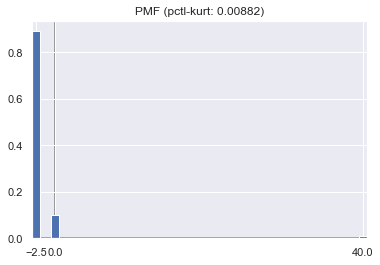

We are -85.00000000% away!



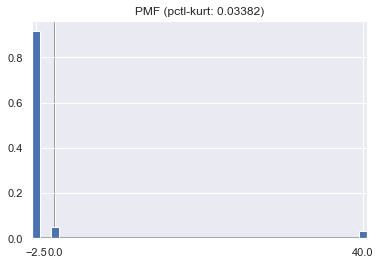

We are -42.50000000% away!



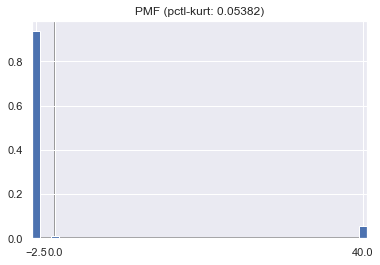

We are -8.50000000% away!



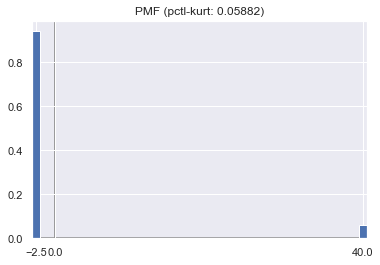

We are -0.00000850% away!



In [66]:
# (arbitrarily close to) the solution, with zero-mean "Generalized Trinoulli"s
for epsilon in 1e-1, 5e-2, 1e-2, 1e-8:
    solve(epsilon=epsilon)

## Appendix: Some ways that will not work

### Fighting the CLT

One of my dumber friends suggested that I simply take a zero-mean base PMF like
`pd.Series({-9: 0.10, +1: 0.90})`
which gives a hefty $90\%$ chance of being positive,
and scaling its width by some constant $c$, the argument being that
its maximum would increase with $c$ whereas its $\sigma$ would increase
with $\sqrt{c}$ and hence eventually its maximum value would "overtake"
its $+4\sigma$ threshold. At that point, there would necessarily be a $90\%$
chance of a $+4\sigma$ event. Obviously this is wrong because
scaling a PMF by $c$ also scales its $\sigma$ by $c$:
$\sigma$ scales with $\sqrt{c}$ when you _add together_ i.i.d. variables,
not just scale up a single one.


Not satisfied with one silly mistake for the night, before going to bed,
he conceded that that wouldn't work, but suggested that I should simply
then take instead the PMF of some sum of i.i.d. random variables
drawn from his base PMF. Then, the $\sigma$ would indeed scale with
$\sqrt{c}$. I am also dumb which is why we're friends, so I actually thought
he'd solved it. I cracked a bottle of champagne and promised to buy him a beer
when Covid ended.


Then I tried it. It does not work. Adding together those i.i.d. random variables
(as opposed to simply scaling up any individual one)
compresses their standard deviation
precisely because probability mass flows inward
_away from the tails_ (toward zero, the mean)
as the "sampling distribution" of their sample mean
(which fixing $c$ is just a deterministically scaled-down version of their sum)
converges to a Normal according to the Central Limit Theorem.

Adding 1 i.i.d. r.v.'s from the base PMF:


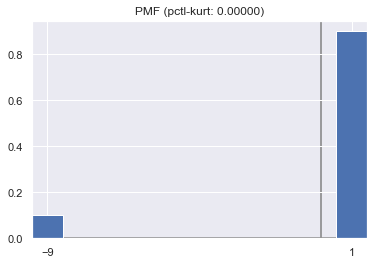

Adding 2 i.i.d. r.v.'s from the base PMF:


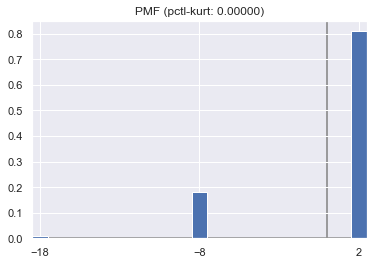

Adding 3 i.i.d. r.v.'s from the base PMF:


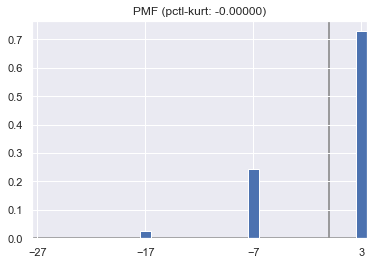

Adding 4 i.i.d. r.v.'s from the base PMF:


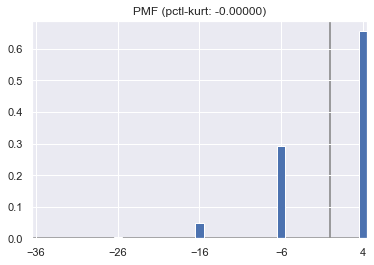

Adding 5 i.i.d. r.v.'s from the base PMF:


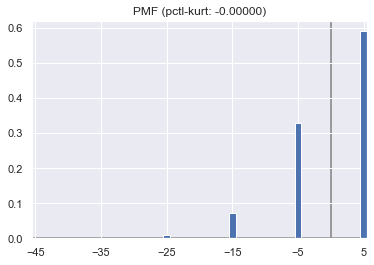

Adding 6 i.i.d. r.v.'s from the base PMF:


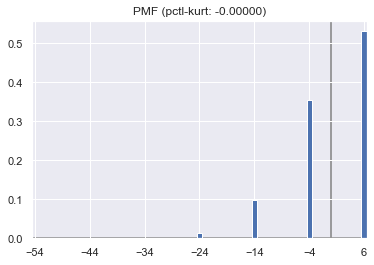

Adding 7 i.i.d. r.v.'s from the base PMF:


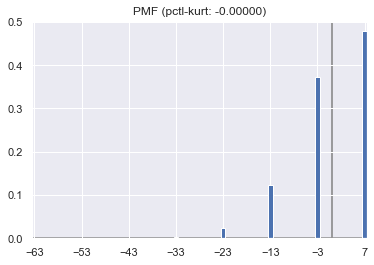

Adding 8 i.i.d. r.v.'s from the base PMF:


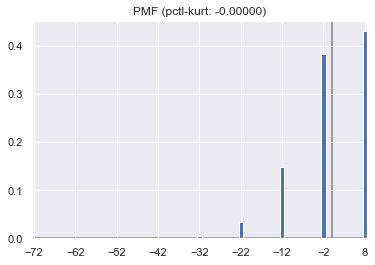

Adding 32 i.i.d. r.v.'s from the base PMF:


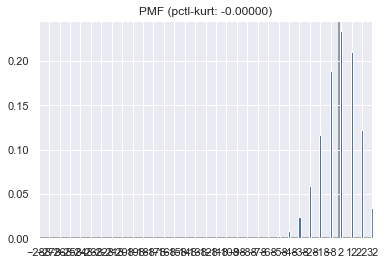

Zoom in to see that the PMF still has a long left tail,
but it's begun to converge to Normal as CLT kicks in:


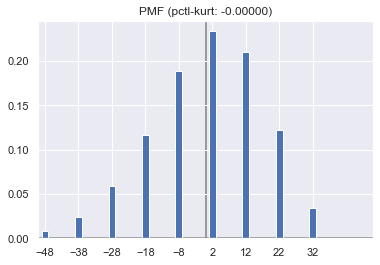

In [3]:
def _get_pmf_of_indep_sum(pmf_a: PMF, pmf_b: PMF) -> PMF:
    """Get the PMF of the sum of two independent random variables."""
    pmf = pd.Series(dtype=float)
    for a, p_a in pmf_a.iteritems():
        for b, p_b in pmf_b.iteritems():
            pmf.loc[a + b] = pmf.get(key=a+b, default=0) + p_a*p_b
    return pmf


def get_pmf_of_indep_sum(pmfs: Iterable[PMF]) -> PMF:
    """Get the PMF of the sum of `len(pmfs)` independent random variables."""
    return reduce(_get_pmf_of_indep_sum, pmfs)


def try_sums() -> None:
    base_pmf = pd.Series({-9: 0.10, +1: 0.90})

    pmf = pd.Series({0: 1.00})
    for c in range(1, 8+1):
        print(f"Adding {c} i.i.d. r.v.'s from the base PMF:")
        pmf = _get_pmf_of_indep_sum(pmf_a=pmf, pmf_b=base_pmf)
        plot_pmf(pmf=pmf)

    c = 32
    print(f"Adding {c} i.i.d. r.v.'s from the base PMF:")
    pmf = get_pmf_of_indep_sum(pmfs=[base_pmf]*c)
    plot_pmf(pmf=pmf, width=2)

    print("Zoom in to see that the PMF still has a long left tail,\n" \
          "but it's begun to converge to Normal as CLT kicks in:")
    plot_pmf(pmf=pmf, width=2, xlim_left=-50, xlim_right=+50)


if __name__ == "__main__":
    try_sums()

### Brute force

#### Stars and bars

My initial compromise was to select some high "resolution" $N$ and simply systematically generate for analysis all the possible discrete PMF's available at this resolution (since we normalize by $N$ before analyzing, we can limit our search to "PMF"s that sum to $N$).


In general, the number of permutations to search over is precisely the number of stars-and-bars [solutions](https://cp-algorithms.com/combinatorics/stars_and_bars.html) with $N$ balls and $N$ possibly-empty urns. This program's time complexity is therefore $O\left(\binom{2N - 1}{N}\right)$. Even $N = 15$ took more than a day; at that rate $N = 16$ would have taken almost a week.


#### Spectral analysis

A good suggestion I had gotten here was a sort of "spectral analysis", choosing a normalized basis of $N_P$ parent PDF's and then systematically generating child PDF's as weighted averages of the parents, searching over grid of $N_C$ coefficients between $0$ and $1$ for each parent.


The combinatorics here do not blow up nearly as fast: The number of permutations to search over is the number of stars-and-bars solutions with $N_C$ and $N_P$ possibly-empty urns. This program's time complexity is therefore $O\left(\binom{N_C + N_P - 1}{N_C}\right) = O\left({N_C}^{N_P}\right)$. Suppose we choose $N_P = 8$ parent PDF's and $N_C = 21$ coefficients (I'm thinking of counting up from $0$ to $1$ in increments of $0.05$): We could hit "Run" before going to bed and the results would be ready in time for breakfast.


However, I had already solved the problem by the time I got the suggestion, so I didn't bother implementing it. It does however raise the interesting question of what the $N_P = 8$ parent basis functions would have looked like.

In [ ]:
N: int = 15  # resolution (higher is better) of our PMF's


def gen_perms(len_: int=N, sum_: int=N) -> Generator[Tuple[int], None, None]:
    """
    Generate permutations of Naturals $\{0, 1, 2, ...\}$
    with length `len_` and sum `sum_`.
    Each permutation is a tuple of the form
    `(n_0, n_1, n_2, ..., n_{len_-1})`.
    
    This is the "stars and bars" problem:
    How many ways can we sort
    `sum_` indistinguishable balls into
    `len_` labelled urns, possibly leaving some urns empty?
    
    This is pretty general code, but we're going to keep it simple by
    fixing some large `N`,
    and then analyzing `gen_perms(len_=N, sum_=N)`. In this usage,
    `N` represents our
    "resolution": Ultimately, we'll normalize (elementwise)
    each permutation by `N` itself and
    thereby yield a well-formed PMF. It's convenient to let
    `sum_ := len_` because
    then we can perfectly encode a Uniform PMF as an $N$-tuple of 1's.
    
    You might notice that as `N` increases, so does the support of our PMF:
    That's OK. The key is that larger `N` gives us more flexibility to create
    finer and finer "shapes" for the PMF. It doesn't matter that in the process
    of creating these shapes, we stretch out the support, because you can
    always just imagine analyzing instead the PMF of the random variable $X/N$
    i.e. our random variable $X$ divided by our fixed resolution $N$,
    thereby shrinking the support
    back down to the interval $[0, 1]$. Results will be equivalent
    for our purposes.
    
    Recursive generator inspired by https://stackoverflow.com/a/7748851.
    We could have saved a bit of time by implementing a dynamic-programming
    solution, but that would require a ton of space to store all the
    permutations in memory. In this case, the space is the limiting resource,
    because there are many many permutations we want to iterate over,
    but generating any single permutation is actually reasonably fast
    relative to the analysis we subsequently run on it.
    """
    if len_ < 1:
        raise ValueError(len_)
    if sum_ < 0:
        raise ValueError(sum_)
    
    # base case
    if len_ == 1:
        # only choice is singleton tuple with `sum_` as its only element
        yield (sum_,)
    # recursive case
    else:
        # iterate over choices for head (first) element i.e. $n_0$
        # `reversed` because i want mass to start at LHS and flow rightward,
        # e.g. first-choice PMF puts 100% weight on `0` not `len_-1`
        for head in range(sum_, -1, -1):
            """
            Now having fixed the head, recursively generate choices for
            the tail (remaining) elements i.e. $n_1, ..., n_{len_-1}$.
            Tail must be `len_ - 1` elements long, and sum to `sum_ - head`.
            """
            for tail in gen_perms(len_=len_-1, sum_=sum_-head):
                # concatenate tuples
                yield (head,) + tail


def get_pmf_from_perm(perm: Tuple[int]) -> PMF:
    """
    Normalize a tuple of ints by its sum, creating a PMF.
    
    input
    -----
    perm: Tuple[int], a permutation of Naturals
        e.g. `(3, 1, 0, 1)`.
    
    output
    -----
    PMF, a well-formed PMF
        e.g. `pd.Series({0: 0.6, 1: 0.2, 2: 0.0, 3: 0.2})`.
    """
    return pd.Series(perm) / sum(perm)


def try_perms() -> Tuple[float, PMF]:
    """
    Loop over permutations, selecting the winner based on
    highest percentile kurtosis.
    """
    # "do-while" structure
    perms = gen_perms()
    # PMF and value associated w/ maximal pctl-kurt seen so far ("do" part)
    argmax_pctl_kurt, max_pctl_kurt = \
        get_pmf_and_pctl_kurt_from_perm(perm=next(perms))
    # iterate through the remaining permutations ("while" part)
    for perm in gen_perms():
        pmf, pctl_kurt = get_pmf_and_pctl_kurt_from_perm(perm=perm)
        if pctl_kurt > max_pctl_kurt:
            max_pctl_kurt = pctl_kurt
            argmax_pctl_kurt = pmf
    plot_pmf(pmf=argmax_pctl_kurt)
    return argmax_pctl_kurt, max_pctl_kurt


if __name__ == "__main__":
    # try_perms()  # takes forever
    pass

### Playing the lottery

The worst would be Monte Carlo, which I've genuinely gotten as a suggestion here. Monte Carlo can be good for pinning down "averages" but is not necessarily always as good for pinning down "extremes". I'm not even going to dignify this suggestion with an implementation.